## HW2

1.	In Python, create a method for scoring the vocabulary size of a text, and normalize the score from 0 to 1. It does not matter what method you use for normalization as long as you explain it in a short paragraph. (Various methods will be discussed in the live session.)

2.	After consulting section 3.2 in chapter 1 of Bird-Klein, create a method for scoring the long-word vocabulary size of a text, and likewise normalize (and explain) the scoring as in step 1 above.

3.	Now create a “text difficulty score” by combining the lexical diversity score from homework 1, and your normalized score of vocabulary size and long-word vocabulary size, in equal weighting. Explain what you see when this score is applied to same graded texts you used in homework 1.


## Part 1: Get the links in text format

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import nltk
import string
from pprint import pprint
from scrapeGutenberg import *
from gutenbergPreprocessing import *
from gutenbergTextMining import *

In [2]:
# bookshelf url
bookshelf = 'http://www.gutenberg.org/wiki/Children%27s_Instructional_Books_(Bookshelf)'

# from the bookshelf get all the book_urls, titles, 
# authors and soup(for getting categories)
book_urls, titles, authors, soup = getBookURLsFromBookShelf(bookshelf)

# construct a books dataframe
books = pd.DataFrame({'url': book_urls, 'title': titles, 'author(s)': authors})

# get books df with categories
books = getCategories(soup, books)

# with categories
display(books.info())
books.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
url          104 non-null object
title        104 non-null object
author(s)    104 non-null object
title_id     104 non-null object
category     104 non-null object
dtypes: object(5)
memory usage: 4.1+ KB


None

,url,title,author(s),title_id,category
0,http://www.gutenberg.org/ebooks/7841.txt.utf-8,"A Primary Reader: Old-time Stories, Fairy Tale...",Children,7841,Misc.
1,http://www.gutenberg.org/ebooks/5742.txt.utf-8,The Bird-Woman of the Lewis and Clark Expedition,Katherine Chandler,5742,Misc.
2,http://www.gutenberg.org/ebooks/13539.txt.utf-8,"Dr. Scudder's Tales for Little Readers, About ...",John Scudder,13539,Misc.
3,http://www.gutenberg.org/ebooks/7425.txt.utf-8,The Louisa Alcott Reader: a Supplementary Read...,Unknown,7425,Misc.
4,http://www.gutenberg.org/ebooks/16046.txt.utf-8,Boy Blue and His Friends,Mary Frances Blaisdell and Etta Blaisdell McD...,16046,Misc.


## Part 2: Remove headers from each of the texts

In [3]:
book_urls = list(books.url.values)
book_texts = getTextFromURLByRemovingHeaders(book_urls)

## Part 3: Homework Question 1: In Python, create a method for scoring the vocabulary size of a text, and normalize the score from 0 to 1. It does not matter what method you use for normalization as long as you explain it in a short paragraph. (Various methods will be discussed in the live session.)


In [4]:
clean_books = cleanTextBooks(book_texts)

In [5]:
normalizedVocab = normalizedVocabularyScore(clean_books)
summary = pd.concat([books, normalizedVocab], axis=1)

In [6]:
cols = ['title', 'v_size', 'v_raw_score', 'v_sqrt_score', 'v_rank_score', 'v_final_score', 'category']
summary[cols].head()

,title,v_size,v_raw_score,v_sqrt_score,v_rank_score,v_final_score,category
0,"A Primary Reader: Old-time Stories, Fairy Tale...",574,0.056263,0.237199,0.086538,0.161869,Misc.
1,The Bird-Woman of the Lewis and Clark Expedition,812,0.079592,0.282121,0.134615,0.208368,Misc.
2,"Dr. Scudder's Tales for Little Readers, About ...",2691,0.263772,0.513587,0.480769,0.497178,Misc.
3,The Louisa Alcott Reader: a Supplementary Read...,2701,0.264752,0.514541,0.490385,0.502463,Misc.
4,Boy Blue and His Friends,852,0.083513,0.288986,0.144231,0.216608,Misc.


In [7]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
url              104 non-null object
title            104 non-null object
author(s)        104 non-null object
title_id         104 non-null object
category         104 non-null object
v_size           104 non-null int64
v_raw_score      104 non-null float64
v_sqrt_score     104 non-null float64
v_rank_score     104 non-null float64
v_final_score    104 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 8.2+ KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

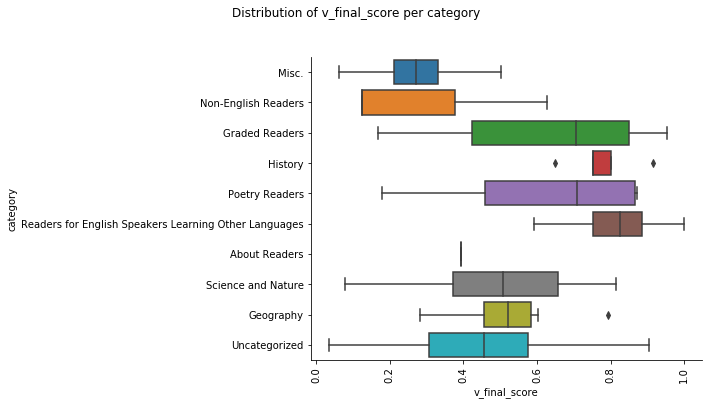

In [9]:
g = sns.catplot(y="category", x="v_final_score", data=summary, 
                kind="box", orient='h', aspect=2)
g.fig.suptitle("Distribution of v_final_score per category", y=1.1)
plt.xticks(rotation=90)
plt.show()

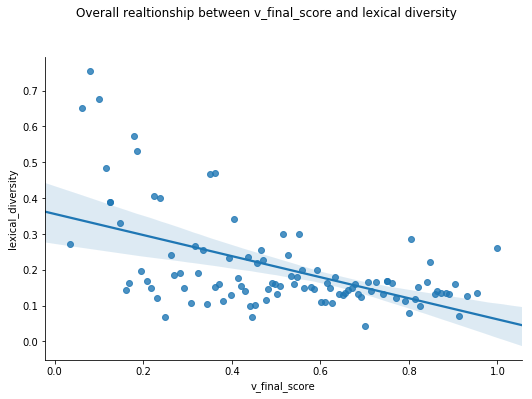

In [10]:
# relation b/w lexical diversity and v_final_score
lexical_diversity = [len(set(book))/len(book) for book in clean_books]
summary['lexical_diversity'] = lexical_diversity

g = sns.lmplot(x='v_final_score', y='lexical_diversity', data=summary, aspect=1.5)
g.fig.suptitle("Overall realtionship between v_final_score and lexical diversity", y=1.1)
plt.show()

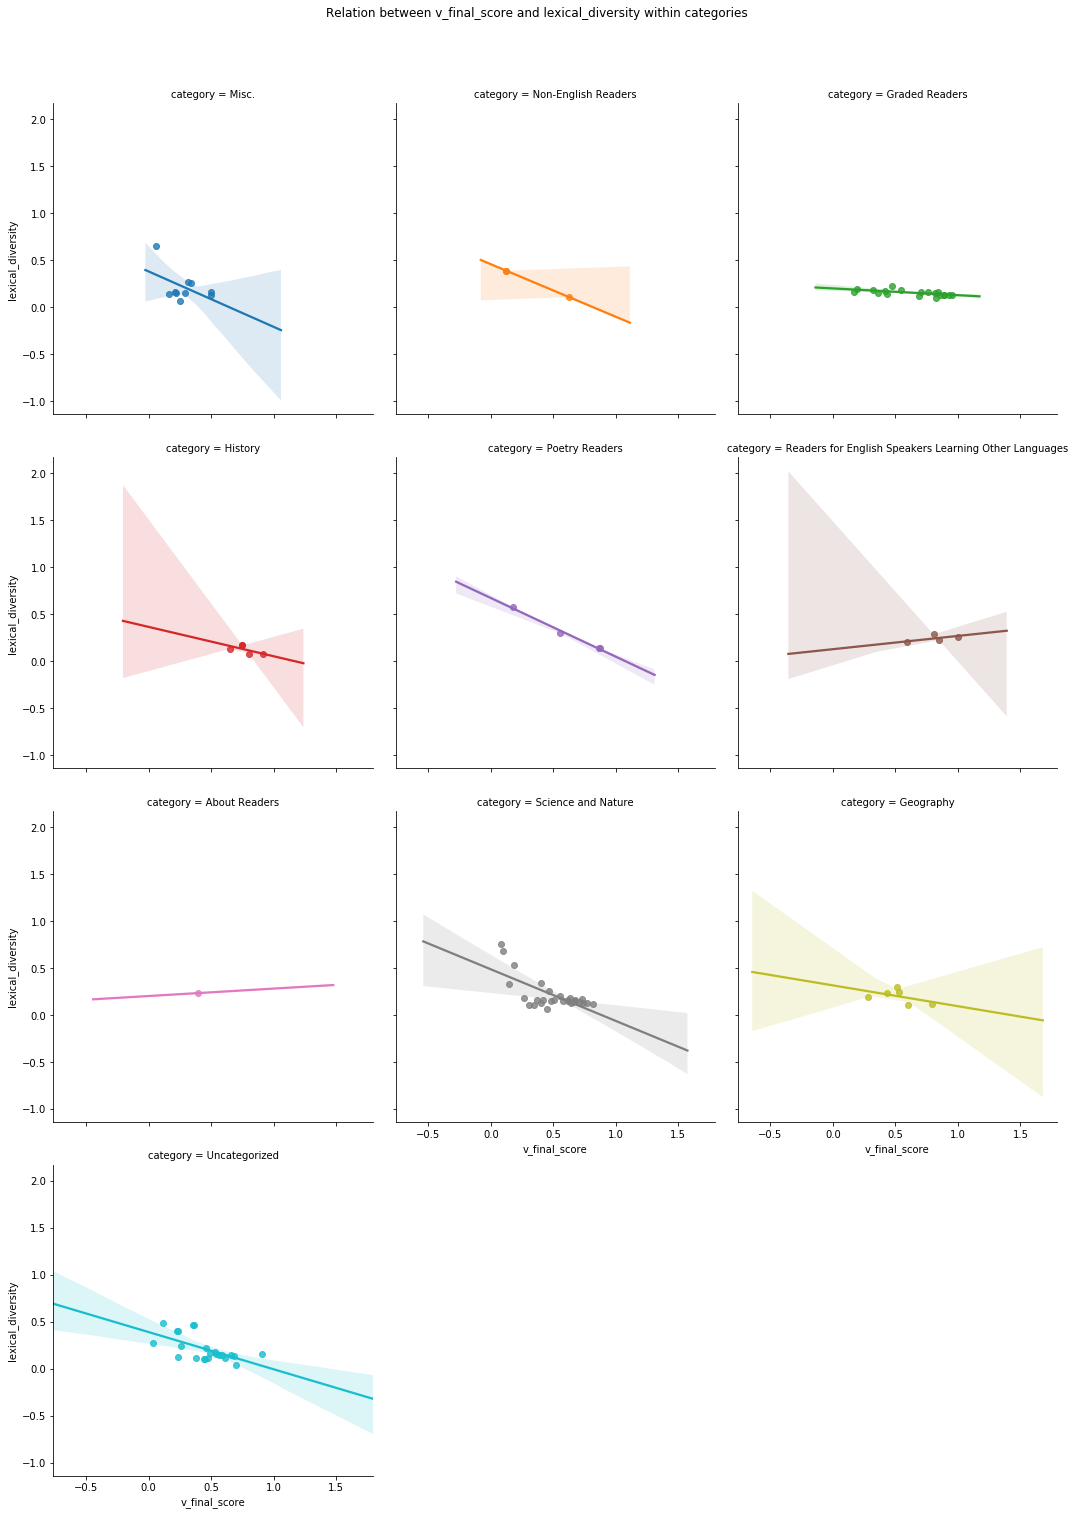

In [11]:
g = sns.lmplot(x='v_final_score', y='lexical_diversity', data=summary, col='category', hue='category', col_wrap=3)
g.fig.suptitle("Relation between v_final_score and lexical_diversity within categories", y=1.05)
plt.show()

## 2.	After consulting section 3.2 in chapter 1 of Bird-Klein, create a method for scoring the long-word vocabulary size of a text, and likewise normalize (and explain) the scoring as in step 1 above.

In [12]:
normalizedLWVocab = normalizedLongWordVocabularyScore(clean_books)
summary = pd.concat([summary, normalizedLWVocab], axis=1)

In [13]:
cols = ['title', 'lw_v_size', 'lw_v_final_score', 'category']
summary[cols].head()

,title,lw_v_size,lw_v_final_score,category
0,"A Primary Reader: Old-time Stories, Fairy Tale...",0,0.012019,Misc.
1,The Bird-Woman of the Lewis and Clark Expedition,5,0.105701,Misc.
2,"Dr. Scudder's Tales for Little Readers, About ...",46,0.352111,Misc.
3,The Louisa Alcott Reader: a Supplementary Read...,44,0.337372,Misc.
4,Boy Blue and His Friends,5,0.105701,Misc.


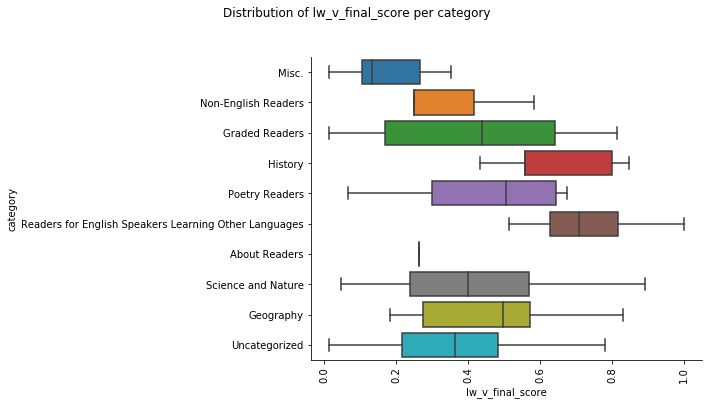

In [14]:
g = sns.catplot(y="category", x="lw_v_final_score", data=summary, 
                kind="box", orient='h', aspect=2)
g.fig.suptitle("Distribution of lw_v_final_score per category", y=1.1)
plt.xticks(rotation=90)
plt.show()

In [15]:
temp = summary.copy()

## 3.	Now create a “text difficulty score” by combining the lexical diversity score from homework 1, and your normalized score of vocabulary size and long-word vocabulary size, in equal weighting. Explain what you see when this score is applied to same graded texts you used in homework 1.

In [16]:
text_difficulty = textDifficultyScore(clean_books)

In [17]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
url                  104 non-null object
title                104 non-null object
author(s)            104 non-null object
title_id             104 non-null object
category             104 non-null object
v_size               104 non-null int64
v_raw_score          104 non-null float64
v_sqrt_score         104 non-null float64
v_rank_score         104 non-null float64
v_final_score        104 non-null float64
lexical_diversity    104 non-null float64
lw_v_size            104 non-null int64
lw_v_final_score     104 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 10.6+ KB


In [18]:
summary = pd.concat([summary, text_difficulty], axis=1)

In [19]:
cols = ['title', 'text_difficulty', 'lexical_diversity', 'lw_v_final_score', 'v_final_score', 'category']
summary[cols]

,title,text_difficulty,lexical_diversity,lw_v_final_score,v_final_score,category
0,"A Primary Reader: Old-time Stories, Fairy Tale...",0.105641,0.143035,0.012019,0.161869,Misc.
1,The Bird-Woman of the Lewis and Clark Expedition,0.160682,0.167977,0.105701,0.208368,Misc.
2,"Dr. Scudder's Tales for Little Readers, About ...",0.336208,0.159334,0.352111,0.497178,Misc.
3,The Louisa Alcott Reader: a Supplementary Read...,0.324520,0.133726,0.337372,0.502463,Misc.
4,Boy Blue and His Friends,0.157070,0.148899,0.105701,0.216608,Misc.
5,The Book of Nature Myths,0.147951,0.068129,0.126125,0.249599,Misc.
6,The Flag of My Country = Shikéyah Bidah Na'at'...,0.254935,0.389189,0.250441,0.125174,Non-English Readers
7,Chambers's Elementary Science Readers,0.193243,0.148262,0.138870,0.292595,Misc.
8,The Little Lame Prince,0.294855,0.255332,0.293887,0.335348,Misc.
9,Harry's Ladder to Learning,0.255175,0.266633,0.181248,0.317645,Misc.


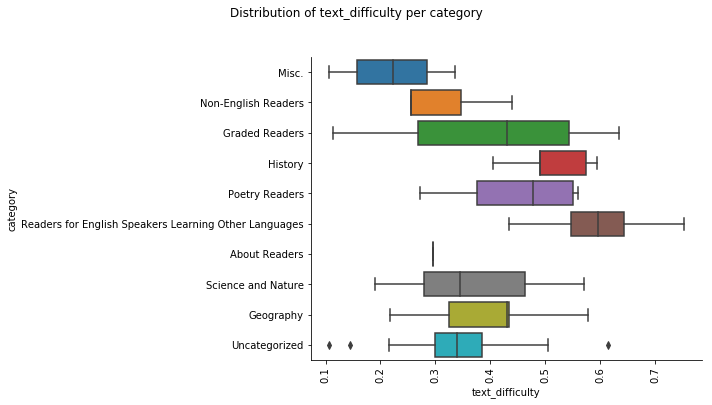

In [20]:
g = sns.catplot(y="category", x="text_difficulty", data=summary, 
                kind="box", orient='h', aspect=2)
g.fig.suptitle("Distribution of text_difficulty per category", y=1.1)
plt.xticks(rotation=90)
plt.show()

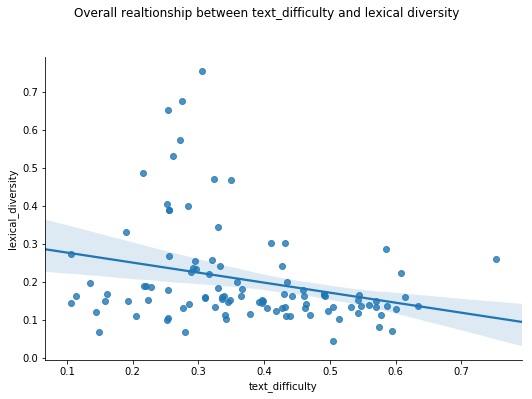

In [21]:
g = sns.lmplot(x='text_difficulty', y='lexical_diversity', data=summary, aspect=1.5)
g.fig.suptitle("Overall realtionship between text_difficulty and lexical diversity", y=1.1)
plt.show()

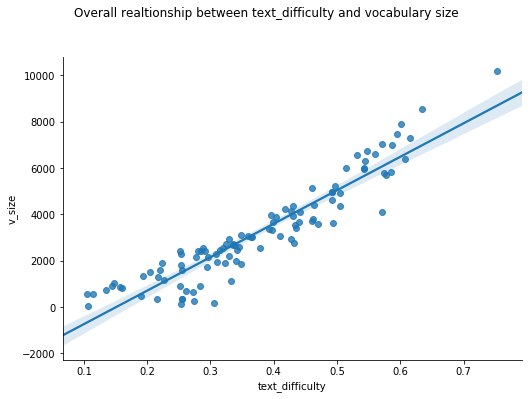

In [22]:
g = sns.lmplot(x='text_difficulty', y='v_size', data=summary, aspect=1.5)
g.fig.suptitle("Overall realtionship between text_difficulty and vocabulary size", y=1.1)
plt.show()

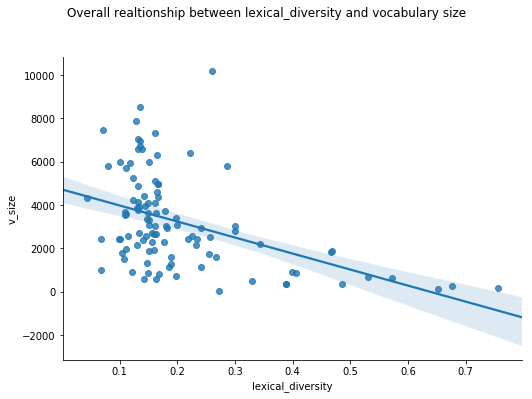

In [23]:
g = sns.lmplot(x='lexical_diversity', y='v_size', data=summary, aspect=1.5)
g.fig.suptitle("Overall realtionship between lexical_diversity and vocabulary size", y=1.1)
plt.show()

### From homework 1:

In [24]:
# grade-level: high school
url1 = "http://www.gutenberg.org/files/22795/22795-0.txt"

# grade-level: third
url2 = "http://www.gutenberg.org/cache/epub/14766/pg14766.txt"

# grade-level: sixth
url3 = "http://www.gutenberg.org/cache/epub/16751/pg16751.txt"

urls = [url1, url2, url3]

In [25]:
book_urls = urls
book_texts= getTextFromURLByRemovingHeaders(book_urls)
clean_books = cleanTextBooks(book_texts)
hw1_text_difficulty = textDifficultyScore(clean_books)

In [26]:
hw1_text_difficulty

,text_difficulty
0,0.555766
1,0.297688
2,0.709249
